In [14]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [50]:
data = pd.read_csv(r"D:\samiran\data_sets\online_store_customer_data.csv", parse_dates=["Transaction_date"])
df = pd.DataFrame(data)

### Information about the Dataset

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_date  2512 non-null   datetime64[ns]
 1   Transaction_ID    2512 non-null   int64         
 2   Gender            2484 non-null   object        
 3   Age               2470 non-null   float64       
 4   Marital_status    2512 non-null   object        
 5   State_names       2512 non-null   object        
 6   Segment           2512 non-null   object        
 7   Employees_status  2486 non-null   object        
 8   Payment_method    2512 non-null   object        
 9   Referal           2357 non-null   float64       
 10  Amount_spent      2270 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 216.0+ KB


In [4]:
df.describe()

,Transaction_date,Transaction_ID,Age,Referal,Amount_spent
count,2512,2512.000000,2470.000000,2357.000000,2270.000000
mean,2020-02-25 06:14:19.872611328,152443.931131,46.637652,0.652100,1418.422577
min,2019-01-01 00:00:00,151200.000000,15.000000,0.000000,2.090000
25%,2019-07-23 00:00:00,151815.750000,32.000000,0.000000,678.192500
50%,2020-02-16 00:00:00,152443.500000,47.000000,1.000000,1341.435000
75%,2020-09-23 00:00:00,153071.250000,62.000000,1.000000,2038.102500
max,2021-05-01 00:00:00,153699.000000,78.000000,1.000000,2999.980000
std,NaN,724.580482,18.186277,0.476405,878.507451


In [5]:
df.describe(include='object')

,Gender,Marital_status,State_names,Segment,Employees_status,Payment_method
count,2484,2512,2512,2512,2486,2512
unique,2,2,50,5,4,3
top,Female,Married,Illinois,Basic,Employees,PayPal
freq,1356,1473,67,1136,946,1168


In [52]:
df[["Age", "Referal"]]=df[["Age", "Referal"]].astype("Int64")
df.dtypes

Transaction_date    datetime64[ns]
Transaction_ID               int64
Gender                      object
Age                          Int64
Marital_status              object
State_names                 object
Segment                     object
Employees_status            object
Payment_method              object
Referal                      Int64
Amount_spent               float64
dtype: object

### Handling missing values

In [ ]:
df.isnull().sum()

Transaction_date      0
Transaction_ID        0
Gender               28
Age                  42
Marital_status        0
State_names           0
Segment               0
Employees_status     26
Payment_method        0
Referal             155
Amount_spent        242
dtype: int64

In [53]:
df = df.dropna(subset="Amount_spent", ignore_index=True)

In [54]:
df.loc[:, "Gender"] = df["Gender"].bfill()

In [61]:
df["Referal"] = df["Referal"].fillna(df["Referal"].mode(dropna=True)[0])

In [64]:
def random_imputation(df, col):
    missing = df[col].isnull()
    df.loc[missing, col] = np.random.choice(df.loc[~missing, col], size=missing.sum(), replace=True)
    return df

df = random_imputation(df, "Age")

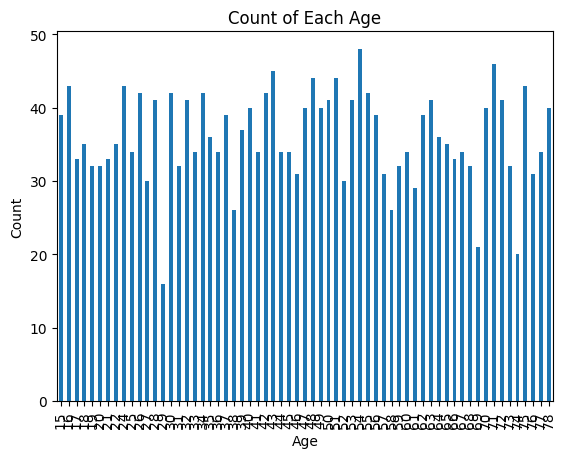

In [65]:
age_counts = df["Age"].value_counts().sort_index()
age_counts.plot.bar()
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Count of Each Age")
plt.show()

In [67]:
df["Employees_status"] = df["Employees_status"].fillna("Others")

In [ ]:
df.to_csv(r"D:\samiran\data_sets\final_customer_data.csv")